## 1. Import Libraries & Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading data
train_data = pd.read_csv('train.csv')

## 2. Initial Data Exploration

#### Check the first 5 rows of dataset

In [3]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Check the last 5 rows of dataset

In [4]:
train_data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### Drop the index column

In [5]:
train_data.drop(['Id'], axis=1, inplace=True)

#### Shape of dataset

In [9]:
train_data.shape

print("Number of Rows",train_data.shape[0])
print("Number of Columns",train_data.shape[1])

Number of Rows 1460
Number of Columns 80


#### Summary of the dataset such as number of entries (rows & columns), column names, non-null counts, and data types for each column.

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Check for missing values

In [11]:
missing_values = train_data.isnull().sum()
missing_values

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

#### List columns along with their missing values

In [12]:
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## 3. Data Visualization & Feature Exploration

#### Overall statistics about the dataset (applied only on the numerical features)

In [13]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Get some insights about the 'SalesPrice' distribution

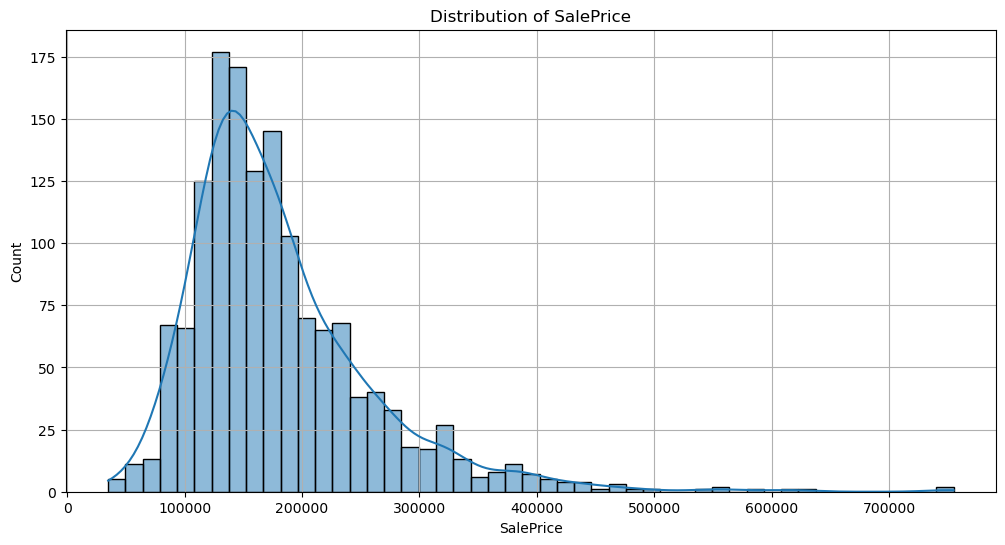

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.grid(True)
plt.show()

In [ ]:
'''
According to the chart, the 'SalePrice' is skewed and need to be normalized

'''

### Feature Creation

#### Create two new features - 'HouseAge' and 'TotalSF'.

In [15]:
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

In [ ]:
'''
Age of house and its total size influences housing prices. Combining these features will simplify and help
stregthen the model to make accurate predictions.

'''

In [16]:
# replace these new features with the original features
train_data = train_data.drop(['YearBuilt', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'YrSold'], axis=1)

In [17]:
train_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,WD,Normal,208500,2566,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,WD,Normal,181500,2524,31


#### Split dataset into numerical and categorical features

In [18]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])
categorical_features = train_data.select_dtypes(include=['object'])

#### Identify the critical columns (key features) in the numerical features

In [19]:
correlations = numerical_features.corr()['SalePrice'].sort_values(ascending=False)
key_features = correlations[abs(correlations) > 0.5]

In [20]:
key_features # List of key features

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearRemodAdd    0.507101
HouseAge       -0.523350
Name: SalePrice, dtype: float64

#### Create heatmap to gain some insights and uncover patterns and relationships among the Key features

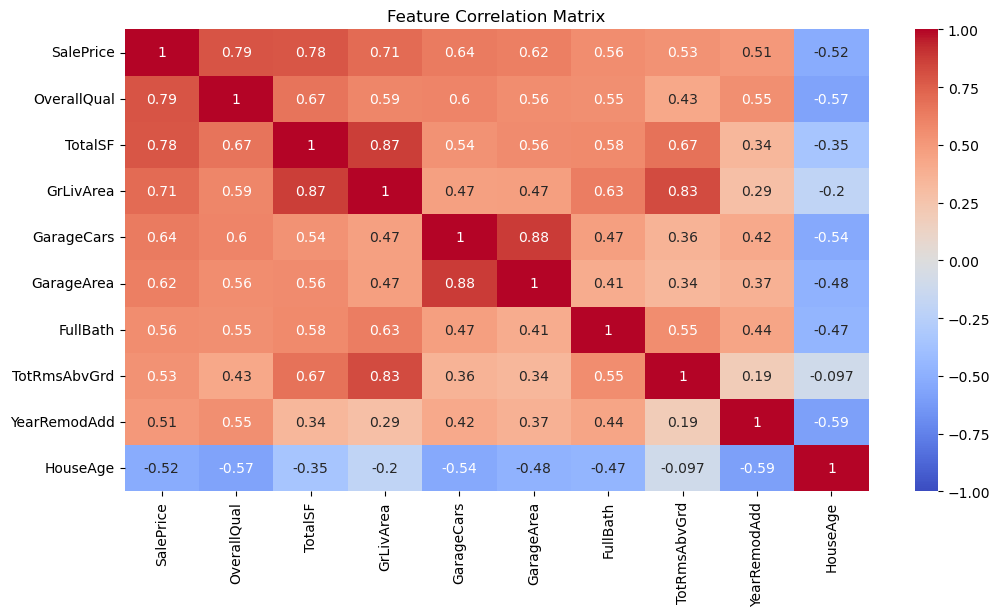

In [21]:
corr_matrix = train_data[['SalePrice', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars', 
                          'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'HouseAge']].corr()

### Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 4. Handling Missing Values

In [22]:
train_data.shape

(1460, 77)

In [23]:
columns_with_missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### Drop Columns with more than 70% missing values

In [24]:
threshold = 0.7 * len(train_data)
columns_to_drop = train_data.columns[train_data.isnull().sum() > threshold]
train_data = train_data.drop(columns=columns_to_drop)

In [25]:
train_data.shape

(1460, 73)

In [26]:
# Update the numerical and categorical features
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])
categorical_features = train_data.select_dtypes(include=['object'])

In [27]:
# Numerical features excluding 'SalePrice'
numerical_features = [col for col in numerical_features if col != 'SalePrice']

#### Applying Imputation method for the numerical features: Using 'Mean' to fill the null values

In [28]:
for col in numerical_features:
    mean_value = train_data[col].mean()
    train_data[col].fillna(mean_value, inplace=True)

#### Applying Imputation method the categorical features: Using 'Mode' to fill the null values

In [29]:
for col in categorical_features:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)

In [30]:
# Verifying that no missing values remain

missing_values = train_data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

Series([], dtype: int64)

In [31]:
train_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,HouseAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,WD,Normal,208500,2566,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,WD,Normal,181500,2524,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,WD,Normal,223500,2706,7


## 5. Handling Outlier

In [32]:
from scipy import stats

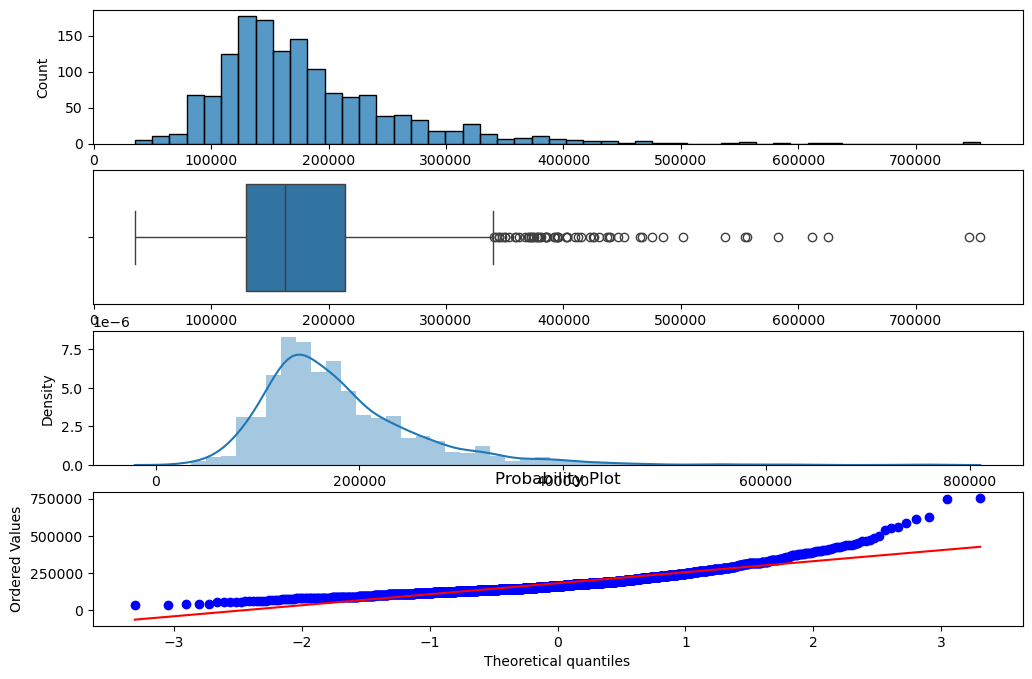

In [33]:
# Checking for outlier in the 'SalePrice' column

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(train_data['SalePrice'])

plt.subplot(412)
sns.boxplot(x=train_data['SalePrice'])

plt.subplot(413)
sns.distplot(train_data['SalePrice'])

plt.subplot(414)
stats.probplot(train_data['SalePrice'], plot=plt)

plt.show()

In [ ]:
'''
In the context of housing prices, high or low prices might be perfectly valid, reflecting unique 
properties or market conditions. Instead of removing the outliers, we'll apply 'Log Transformation',
which reduces the impact of extremely high or low values. 

'''

#### Applying Log-transformation to normalize the 'SalePrice' column

In [34]:
train_data['LogSalePrice'] = np.log1p(train_data['SalePrice'])

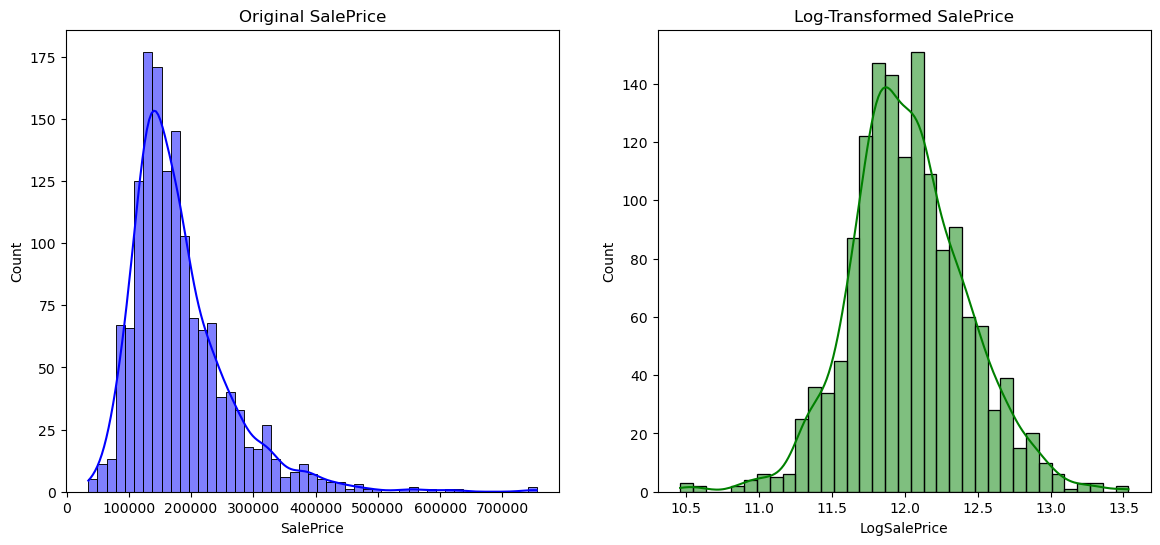

In [35]:
# Visualizing SalePrice (original) Vs LogSalePrice(log-transformed)

plt.figure(figsize=(14, 6))

# SalePrice
plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], kde=True, color='blue')
plt.title('Original SalePrice')

# LogSalePrice
plt.subplot(1, 2, 2)
sns.histplot(train_data['LogSalePrice'], kde=True, color='green')
plt.title('Log-Transformed SalePrice')

plt.show()

In [ ]:
'''
The "SalePrice" which is skewed (as seen in the blue chart) has been normalized (as seen in the green chart).
This approach improves the performace of machine learning model thereby making accurate predictions
'''

In [36]:
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [37]:
# Renaming 'LogSalePrice' to 'SalePrice'
train_data.rename(columns={'LogSalePrice': 'SalePrice'}, inplace=True)

In [38]:
train_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,HouseAge,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,WD,Normal,2566,5,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,WD,Normal,2524,31,12.109016


#### Checking for outlier in some of the numerical features

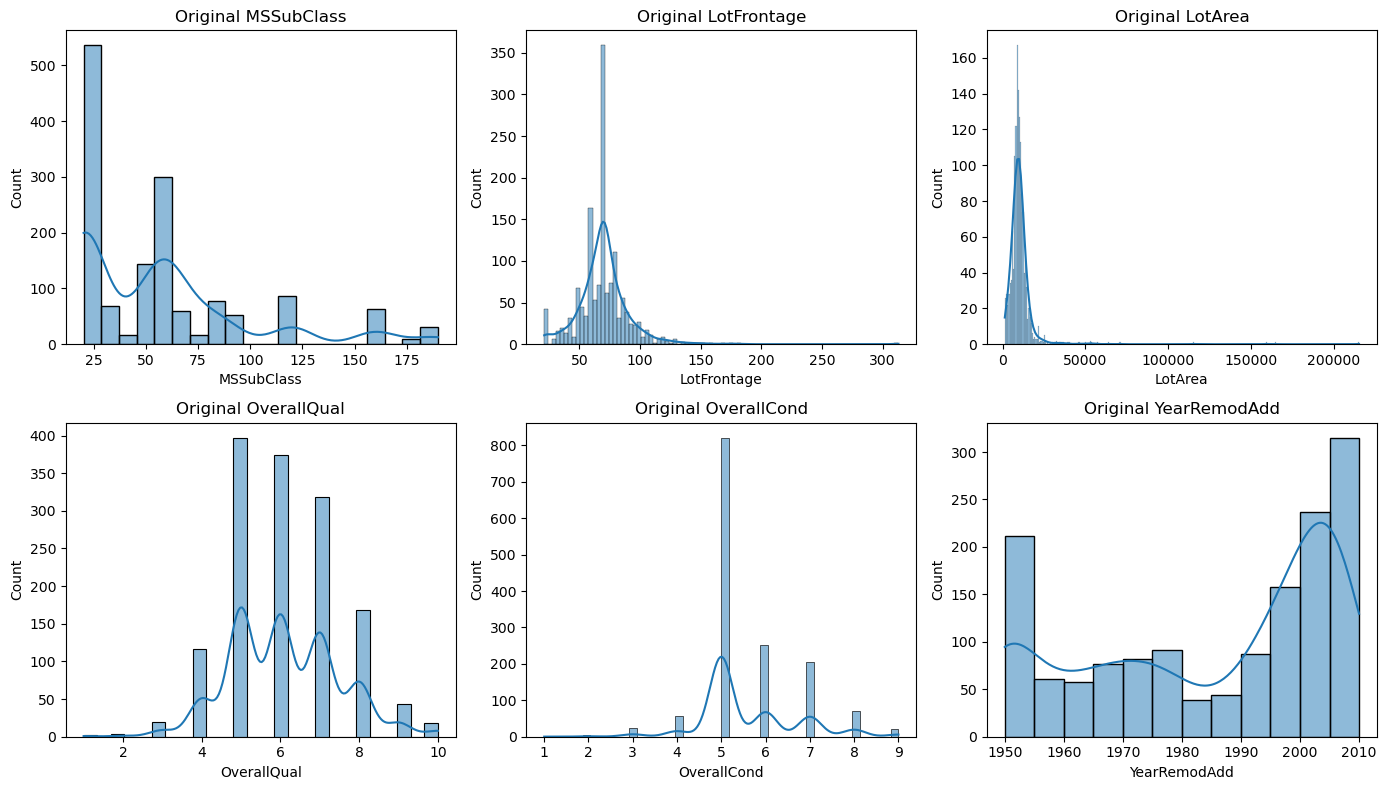

In [39]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Original {feature}')

plt.tight_layout()
plt.show()

In [ ]:
'''
The "OverallQual", "OverallCond", and "YearRemodAdd" appear to be normalized while the rest are
are skewed. Since we have 37 numerical features, it's crucial to apply log transformation across board
for better model performance.
'''

#### Applying log transformation to normalize the rest of the numerical features excluding 'SalePrice'

In [40]:
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('SalePrice')

In [41]:
# log transformation
for feature in numerical_features:
    train_data[feature] = np.log1p(train_data[feature])

#### Visualizing some of the transformed numerical features features

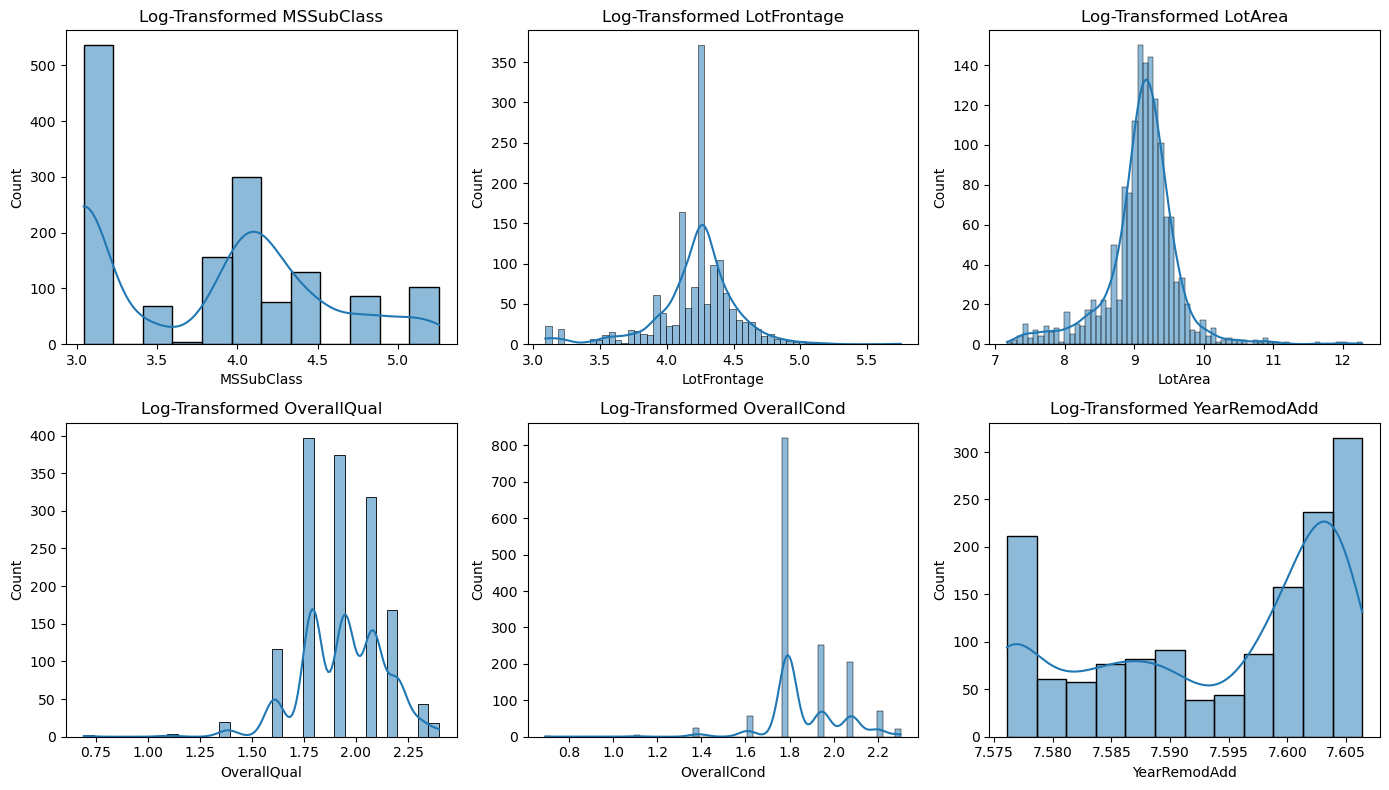

In [42]:
plt.figure(figsize=(14, 8))

for i, feature in enumerate(numerical_features[:6]):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Log-Transformed {feature}')

plt.tight_layout()
plt.show()

In [43]:
train_data.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,HouseAge,SalePrice
0,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,0.0,1.098612,WD,Normal,7.850493,1.791759,12.247699
1,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.0,0.0,0.0,0.0,1.791759,WD,Normal,7.833996,3.465736,12.109016


## 7. Feature Engineering: One-Hot Encoding/Mean Encoding

In [44]:
for feature in categorical_features:
    print('{} has total {} unique features'.format(feature , train_data[feature].nunique()))

MSZoning has total 5 unique features
Street has total 2 unique features
LotShape has total 4 unique features
LandContour has total 4 unique features
Utilities has total 2 unique features
LotConfig has total 5 unique features
LandSlope has total 3 unique features
Neighborhood has total 25 unique features
Condition1 has total 9 unique features
Condition2 has total 8 unique features
BldgType has total 5 unique features
HouseStyle has total 8 unique features
RoofStyle has total 6 unique features
RoofMatl has total 8 unique features
Exterior1st has total 15 unique features
Exterior2nd has total 16 unique features
MasVnrType has total 3 unique features
ExterQual has total 4 unique features
ExterCond has total 5 unique features
Foundation has total 6 unique features
BsmtQual has total 4 unique features
BsmtCond has total 4 unique features
BsmtExposure has total 4 unique features
BsmtFinType1 has total 6 unique features
BsmtFinType2 has total 6 unique features
Heating has total 6 unique featur

In [ ]:
'''
We have some features like 'Neighborhood', 'Exterior1st', and 'Exterior2nd' with many uniques features. 
If we use one-hot encoding for these features, we'll end up with 56 extra columns 
(25 from 'Neighborhood', 15 from 'Exterior1st', and 16 from 'Exterior2nd'). This will use more memory 
and make our analysis more complex, but if these features have high predictive power, the extra effort 
and memory usage can be worth it for better model performance.

'''

#### Calculating the predictive power of the categorical features

In [45]:
frequency_dict = {}

for column in categorical_features:
    if train_data[column].dtype == 'object':
        
        value_counts = train_data[column].value_counts()
        top_5 = value_counts.head(5)
        percentage = (top_5 / len(train_data)) * 100
        total_percentage = percentage.sum()
        frequency_dict[column] = total_percentage

In [ ]:
'''
The basis for calculating the Predictive Power: The top 5 unique features per feature (column) 
should have data points from 80-90% and above to be considered as having high predictive power.
'''

#### Visualizing the predictive power for each feature in the categorical features

In [46]:
heatmap_train_data = pd.DataFrame(list(frequency_dict.items()),
                                  columns=['Column', 'Total Percentage of Top 5'])

heatmap_train_data  = heatmap_train_data.set_index('Column')

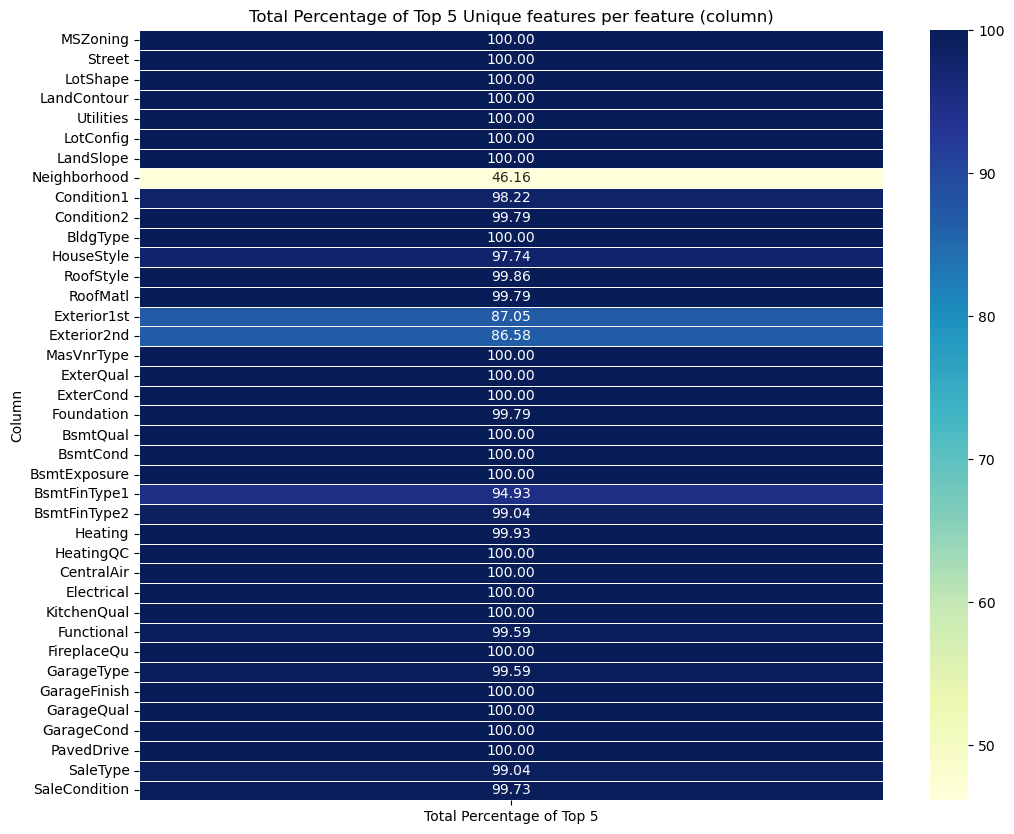

In [47]:
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_train_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=.5)
plt.title('Total Percentage of Top 5 Unique features per feature (column)')
plt.show()

In [ ]:
'''

From the heatmap, the top 5 unique features for 'Neighborhood' is 46.16%. 
Thus, 'Neighborhood' did not meet the 80-90% data points. As a result, mean encoding will be used instead

'''

In [48]:
# list categorical features
', '.join(categorical_features)

'MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition'

In [49]:
# Columns suitable for one-hot encoding
one_hot_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 
                'SaleCondition']

#### Applying One-hot encoding to categorical features excluding the 'Neighborhood'

In [50]:
train_data = pd.get_dummies(train_data, columns=one_hot_cols, drop_first=True)

#### Applying Mean Encoding to 'Neighborhood'

In [51]:
mean_encode_cols = ['Neighborhood']

mean_encoded_values = {}
for col in mean_encode_cols:
    mean_encoded_values[col] = train_data.groupby(col)['SalePrice'].mean()

for col in mean_encode_cols:
    train_data[col] = train_data[col].map(mean_encoded_values[col])

In [52]:
train_data.head(2)

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,12.163647,2.079442,1.791759,7.602900,5.283204,6.561031,0.0,...,False,False,False,False,True,False,False,False,True,False
1,3.044522,4.394449,9.169623,12.344180,1.945910,2.197225,7.589336,0.000000,6.886532,0.0,...,False,False,False,False,True,False,False,False,True,False


In [53]:
# Coverting boolean columns into numeric values

for col in train_data.select_dtypes(include='bool').columns:
    train_data[col] = train_data[col].replace({False: 0, True: 1})

In [54]:
train_data.head(2)

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,12.163647,2.079442,1.791759,7.602900,5.283204,6.561031,0.0,...,0,0,0,0,1,0,0,0,1,0
1,3.044522,4.394449,9.169623,12.344180,1.945910,2.197225,7.589336,0.000000,6.886532,0.0,...,0,0,0,0,1,0,0,0,1,0


## 8. Model Development & Training

#### Define dependent and independent features

In [55]:
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

#### Split the data into training and test datasets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Initializing the model with default parameters

In [57]:
lr_model = LinearRegression()

#### Fitting the model to the data

In [58]:
lr_model.fit(X_train,y_train)

LinearRegression()

## 9. Making predictions

In [59]:
y_pred = lr_model.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

#### Evaluating the model

In [61]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Validation RMSE: {rmse}')
print(f'Validation R²: {r2}')

Validation RMSE: 0.1647093674366244
Validation R²: 0.8546217673112548


In [ ]:
'''
The Validation RMSE of 0.165 means that, our predictions are off by about 0.165 units from the 
actual values. The Validation R² of 0.855 means that, about 85.5% of the variation in the data is 
explained by our model, which indicates a good fit.

'''

In [62]:
from sklearn.model_selection import cross_val_score

#### Generating cross-validation score

In [63]:
cv_rmse = np.sqrt(-cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')).mean()
print(f'Cross-Validation RMSE: {cv_rmse}')

Cross-Validation RMSE: 0.15610907928633538


In [ ]:
'''
The Cross-Validation RMSE of 0.156 means that, the model's predictions are off by about 0.156 units 
when tested on different subsets of the data. This provides a more reliable measure of the 
model's performance across various data samples.

'''

## Preparing data for submission

In [64]:
# Get the corresponding test set from the original dataframe
test_data = train_data.iloc[X_test.index]

In [65]:
# Add a new column for the predicted prices
test_data['PredictedSalePrice'] = y_pred

In [66]:
# Create a new dataframe with only 'SalePrice', and 'PredictedSalePrice'
predicted_results = test_data[['SalePrice', 'PredictedSalePrice']]

In [68]:
# Display the new dataframe
predicted_results.head(2)

,SalePrice,PredictedSalePrice
892,11.947956,11.915738
1105,12.691584,12.740760


In [69]:
# Convert predictions back to the original scale
predicted_results = np.exp(predicted_results)

In [70]:
predicted_results.head(2)

,SalePrice,PredictedSalePrice
892,154501.0,149602.693834
1105,325001.0,341383.033623


In [71]:
# Round the 'PredictedSalePrice' column to 3 decimal points
predicted_results['PredictedSalePrice'] = predicted_results['PredictedSalePrice'].round(3)

In [72]:
predicted_results.head(20)

,SalePrice,PredictedSalePrice
892,154501.0,149602.694
1105,325001.0,341383.034
413,115001.0,105329.993
522,159001.0,164283.626
1036,315501.0,340145.205
614,75501.0,79064.138
218,311501.0,240341.656
1160,146001.0,147444.990
649,84501.0,76187.556
887,135501.0,146599.411


## Insights:

In [ ]:
'''
1. Creating new features like 'HouseAge' and 'TotalSF' strengthens the model to make better 
predictions. These are strong factors that impact housing prices.

2. Rather than removing rows with missing values, we applied Imputation method to uphold 
data integrity thereby keeping model performance stable.

3. Outliers especially in housing prices might be valid. Instead of removing them, 
we applied log transformation to create a normal distribution thereby improving the prediction 
accuracy of model

4. The cross-validation score (0.156) being close to the validation score (0.165) shows that the 
model will likely perform well on unseen data. This suggests that the model has a stable 
performance and generalizes well, without significant overfitting or underfitting.


'''

## Conclusion:

In [ ]:
'''
The model is performing well and reliable at predicting housing prices, with a low error and 
high accuracy. However, there's still room for improvement by incorporating more advanced algorithms like Ridge Regression, RandomForest, and XGBoost. 

Additionally, performing hyperparameter tuning as part of the modeling process can also enhance accuracy and performance.
'''